# **Project 2 - Part 3**
*   Samar KRIMI
*   08/09/2023

---

We will use the pre-approved dataset called **Stroke Prediction Dataset**. Stroke can be very hard to predict and therefore try to hinder, because it is the result of many different pathophysiologies.

1. Source of data :
Here is the link for where the data is found from kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data :
This is a healthcare dataset used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target :
There are 2 possible classes : predict stroke (target): 1 if the patient had a stroke or 0 if not.

4. What does one row represent :
Each row represents a specific patient.

5. Is this a classification or regression problem :
This is a binary classification problem.

6. How many features does the data have :
The data contains 12 attributes (columns).

7. How many rows are in the dataset :
The data contains 5110 observations (rows).

8. What challenges do you foresee in cleaning, exploring, or modeling this dataset :
- In cleaning :
Clean inaccurate or incorrect values, missing or incomplete data, outlier or anomalous data, and duplicate or redundant data.
I have to deal with inconsistent or conflicting features that creates confusion, incorrect features that could lead to bad decision-making and also affect the patient's life.
- In Exploring :
Identify relationships between different data variables and the distribution of data values in order to reveal patterns and points of interest, enabling to gain greater insight into the raw data.
- In Modeling :
Choose the right data model especially when data is unbalanced, regularize the model by tunning hyperparameters and dealing with class imbalance and compare the model's performance.

In [ ]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load & read data from folder structure
fpath = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(fpath)
# Explore data : missing values, columns, types
df.info()
# Top rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Check target balance
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# Check target balance in percent : a highly unbalanced dataset
df['stroke'].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
# Set the parameters that control the general style of the plots
sns.set_style("whitegrid")
# change the global styling for all plots
plt.style.use("fivethirtyeight")

<Axes: >

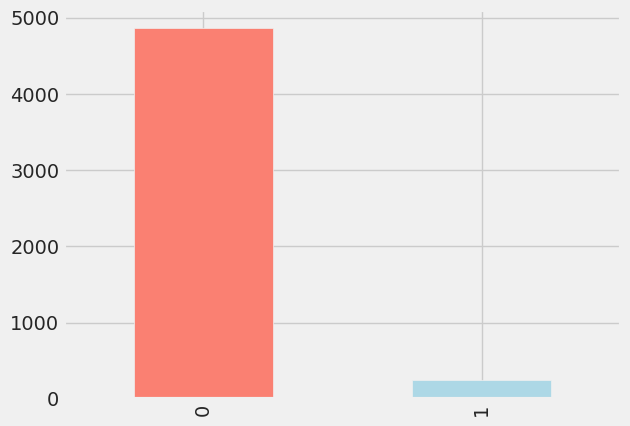

In [ ]:
# Barplot for the unbalanced dataset
df.stroke.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 249 patients that have a stroke and 4861 patients without having a stroke, so our problem is unbalanced.

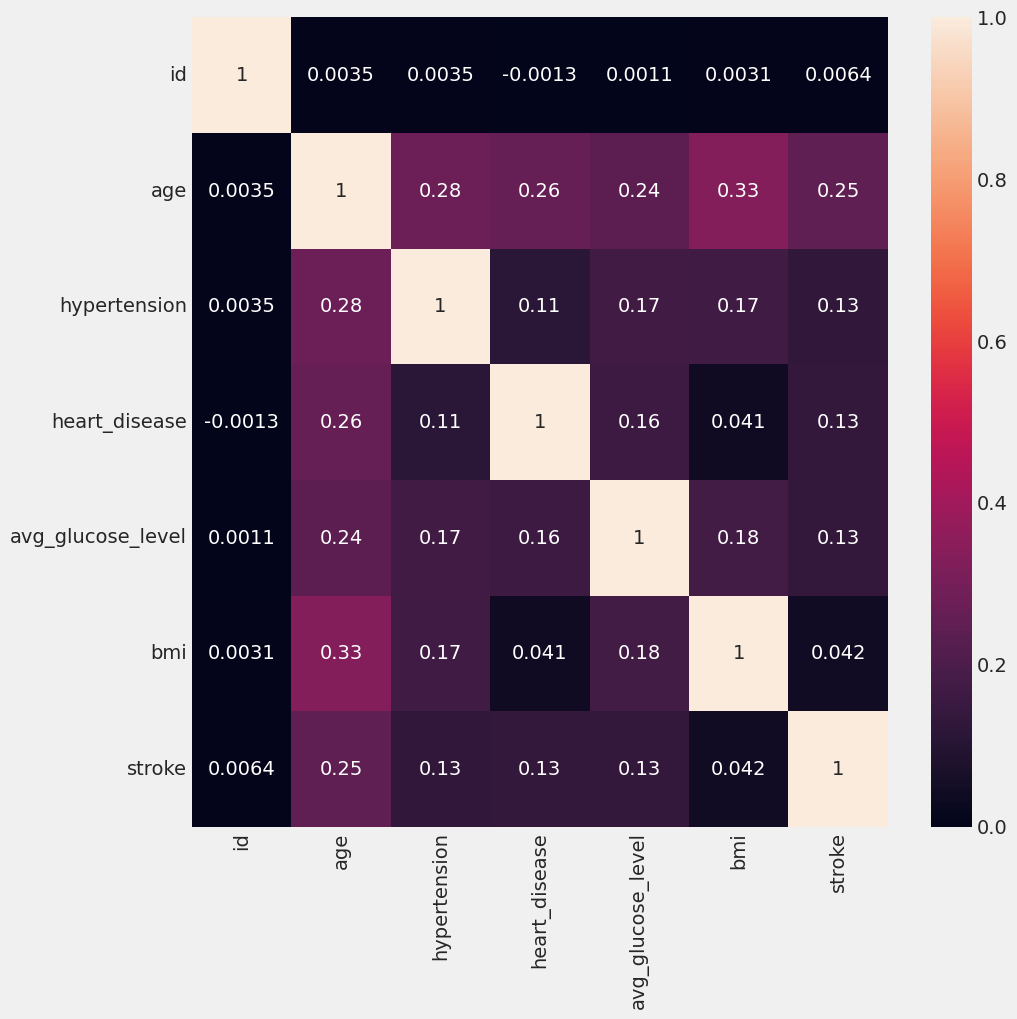

In [ ]:
# Check the correlation between all features and target : low correlation & very low correlation
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax);

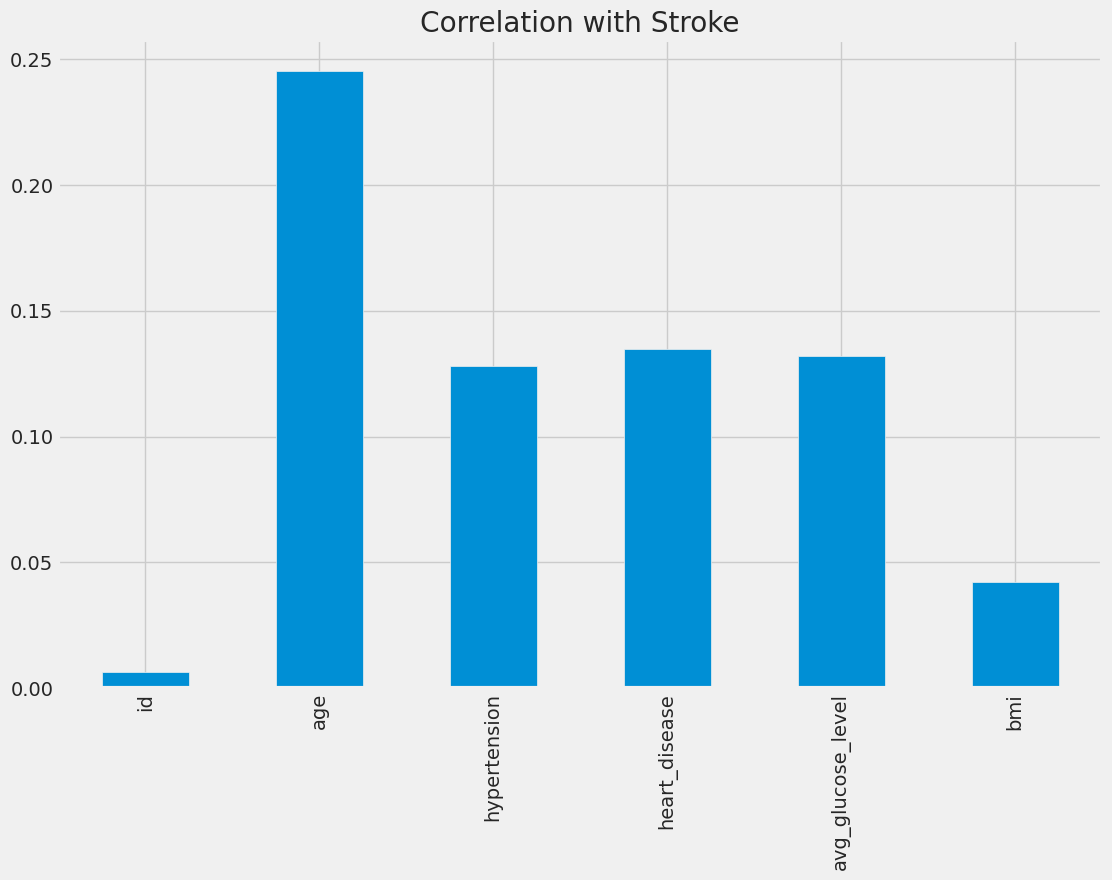

In [ ]:
# 'stroke' is a target in this case numeric
df.drop('stroke', axis=1).corrwith(df['stroke']).plot(kind='bar', grid=True, figsize=(12, 8),title="Correlation with Stroke");

* Observations from correlation :

bmi feature is the least correlated with the target (stroke), it has a very low correlation. For age and avg_glucose_level features they have a low positive correlation.

# **EDA : Cleaning Data**

## Deleted unnecessary columns

In [ ]:
# Drop unnecessery columns ('id' is not predictive)
df=df.drop(columns=['id'])

In [ ]:
# Check dataframe after deleting unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Deleted duplicate rows

In [ ]:
# Check for exact duplicates (rows) : No duplicated
df.duplicated().sum()

0

## Identified and addressed missing values

In [ ]:
# Check missing values
df.isna().sum().sum()

201

In [ ]:
# Check missing values in each feature
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Exploratory Visualization to determine the best imputation method for the numerical column 'bmi'
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

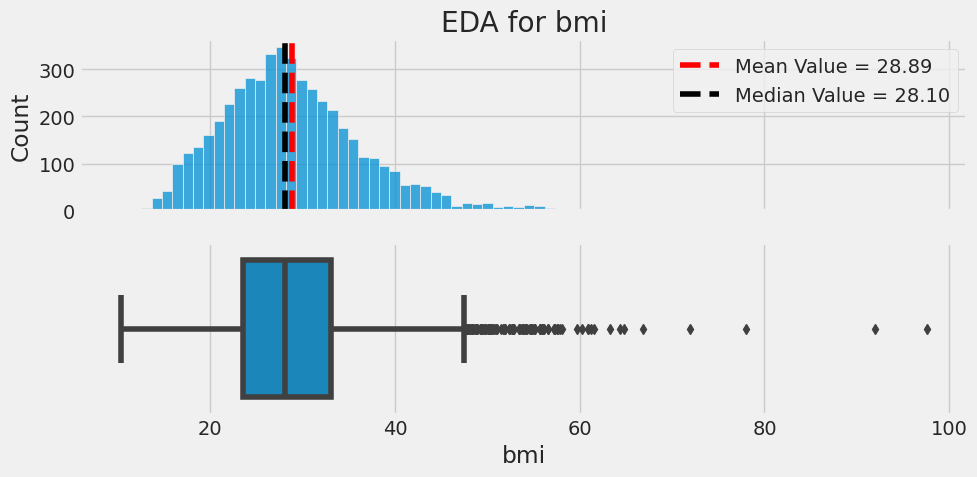

In [ ]:
plot_numeric(df,'bmi')

* Missing values in 'bmi' feature = 3.93% < 5% we can drop them but I choose to impute the values by simple imputation technique: The distribution is symetric bimodal, therefore the missing value will be imputed with the mean.

In [ ]:
# Impute missig values in 'bmi'feature by median
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [ ]:
# No remaining missing values
df.isna().sum().sum()

0

## Identified and corrected inconsistencies in data for categorical values

In [ ]:
# Check for total values for each type
df.dtypes.value_counts()

object     5
float64    3
int64      3
dtype: int64

In [ ]:
# The 'hypertension', 'heart_disease', 'stroke' columns are nominal categorical variables 1 : Yes, 0 : No
# Convert the datatype from integer to object
df['hypertension'] = df['hypertension'].astype(object)
df['heart_disease'] = df['heart_disease'].astype(object)

In [ ]:
# Check types after conversion
df.dtypes.value_counts()

object     7
float64    3
int64      1
dtype: int64

In [ ]:
# Identify string columns after conversion
string_cols = df.select_dtypes("object").columns
string_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

We have 8 Nominal Features: gender, ever_married, work_type, Residence_type, smoking_status, hypertension, heart_disease and stroke (target).

In [ ]:
# Checking nuniuqe categories : No feature with high cardinality to drop
df.select_dtypes('object').nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [ ]:
# Check the categorical values of 'gender' feature => nominal feature
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
# Inconsistent category from gender column is fixed : replace Other by Male (the lower category)
df['gender'] = df['gender'].replace(['Other'],['Male'])
df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [ ]:
# Check the categorical values of 'ever_married' feature => nominal feature
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
# Check the categorical values of 'work_type' feature => nominal feature
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
# Inconsistent category from 'work_type' column is fixed : replace children (first lower letter) by Children (first Upper letter)
df['work_type'] = df['work_type'].replace(['children'],['Children'])
df['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
# Filter the 22 patients whom never worked ranked by age
df.loc[df['work_type']=='Never_worked'].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4410,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
3196,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
3972,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
2740,Male,15.0,0,0,No,Never_worked,Rural,79.59,28.4,Unknown,0
2781,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0
4068,Female,16.0,0,0,No,Never_worked,Urban,102.10,27.1,never smoked,0


I leave the 22 few number Never_worked, I can't replace it with children because the children's age not exceed 16 years and Never_worked have some ages between 17 & 23 years.

In [ ]:
# Check the categorical values of 'Residence_type' feature => nominal feature
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
# Check the categorical values of 'smoking_status' feature => nominal feature
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# Inconsistent category from smoking_status column is fixed : replace Unknown by occasional smoker
df['smoking_status'] = df['smoking_status'].replace(['Unknown'],['occasional smoker'])
df['smoking_status'].value_counts()

never smoked         1892
occasional smoker    1544
formerly smoked       885
smokes                789
Name: smoking_status, dtype: int64

In [ ]:
# Obtain the value counts for all string columns adressed
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for gender
Female    2994
Male      2116
Name: gender, dtype: int64


Value Counts for hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked         1892
occasional smoker    1544
formerly smoked       885
smokes                789
Name: smoking_status, dtype: int64




## Identified and corrected inconsistencies in data for numeric values

In [ ]:
# Convert the datatype from float to integer
df['age'] = df['age'].astype(int)

In [ ]:
# Check the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 439.3+ KB


In [ ]:
# Check types after conversion : dtypes are consistent and make sense
df.dtypes.value_counts()

object     7
int64      2
float64    2
dtype: int64

In [ ]:
# Checking nuniuqe categories
df.select_dtypes('number').nunique()

age                    83
avg_glucose_level    3979
bmi                   419
stroke                  2
dtype: int64

In [ ]:
# Checking for inconsistent numeric variables
# Limit output to min, max, 25% and 75%
df.describe().round(2).loc[['mean','min','25%','75%','max']]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
# Impossible value for min age (must be > 0 year): we should fix it by its mean value
df[['age']].mean()

age    43.215264
dtype: float64

In [ ]:
# Replace min=0 by its mean value in 'age' feature
df['age']=df['age'].replace(0, df['age'].mean())

In [ ]:
# Check statistics after fixing 'age' feature
df.describe().round(2).loc[['mean','min','25%','75%','max']]

,age,avg_glucose_level,bmi,stroke
mean,43.58,106.15,28.89,0.05
min,1.00,55.12,10.30,0.00
25%,26.00,77.24,23.80,0.00
75%,61.00,114.09,32.80,0.00
max,82.00,271.74,97.60,1.00


In [ ]:
# Check for unique values in columns
df.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# Check the values of the dataframe
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : ['Male' 'Female']
age : [67.         61.         80.         49.         79.         81.
 74.         69.         59.         78.         54.         50.
 64.         75.         60.         57.         71.         52.
 82.         65.         58.         42.         48.         72.
 63.         76.         39.         77.         73.         56.
 45.         70.         66.         51.         43.         68.
 47.         53.         38.         55.          1.         46.
 32.         14.          3.          8.         37.         40.
 35.         20.         44.         25.         27.         23.
 17.         13.          4.         16.         22.         30.
 29.         11.         21.         18.         33.         24.
 34.         36.         43.21526419 41.          5.         26.
 31.          7.         12.         62.          2.          9.
 15.         28.         10.         19.          6.        ]
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['

In [ ]:
# Replace float values by their mean rounded values in age & bmi features
df['age']=df['age'].round()
df['bmi']=df['bmi'].round(1)

In [ ]:
# Check the values of the dataframe fixed
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

gender : ['Male' 'Female']
age : [67. 61. 80. 49. 79. 81. 74. 69. 59. 78. 54. 50. 64. 75. 60. 57. 71. 52.
 82. 65. 58. 42. 48. 72. 63. 76. 39. 77. 73. 56. 45. 70. 66. 51. 43. 68.
 47. 53. 38. 55.  1. 46. 32. 14.  3.  8. 37. 40. 35. 20. 44. 25. 27. 23.
 17. 13.  4. 16. 22. 30. 29. 11. 21. 18. 33. 24. 34. 36. 41.  5. 26. 31.
  7. 12. 62.  2.  9. 15. 28. 10. 19.  6.]
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'Children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
avg_glucose_level : [228.69 202.21 105.92 ...  82.99 166.29  85.28]
bmi : [36.6 28.9 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.1 31.1 21.7 27.  24.1 45.9
 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8 34.6
 19.4 30.3 41.5 22.6 

# **FEATURES INSPECTION**

## **NUMERIC FEATURES**

In [ ]:
# Set the parameters that control the general style of the plots
sns.set_style("whitegrid")
# change the global styling for all plots
plt.style.use("fivethirtyeight")

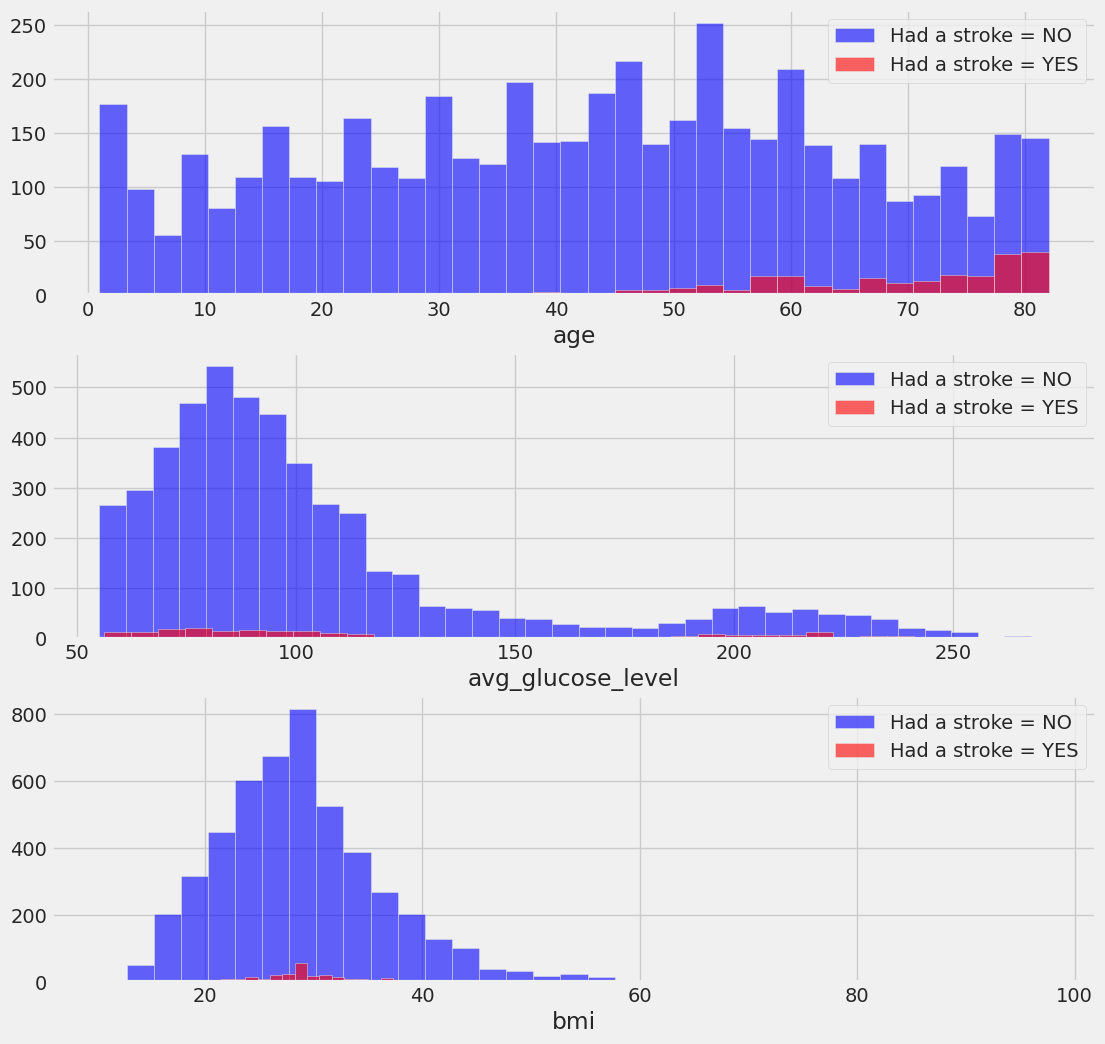

In [ ]:
# Plot histograms for all numeric features
plt.figure(figsize=(12, 12))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 1, i)
    df[df["stroke"] == 0][column].hist(bins=35, color='blue', label='Had a stroke = NO', alpha=0.6)
    df[df["stroke"] == 1][column].hist(bins=35, color='red', label='Had a stroke = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

> ## Custom functions for exploring numeric features

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features"""

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. CATEGORICAL TARGET"""
def plot_numeric_vs_target(df, x, y='stroke',
                           figsize=(6,4),
                           ):
   # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### **bmi feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "bmi"
df[feature].dtype

dtype('float64')

### Univariate visualization showing the distribution of bmi values

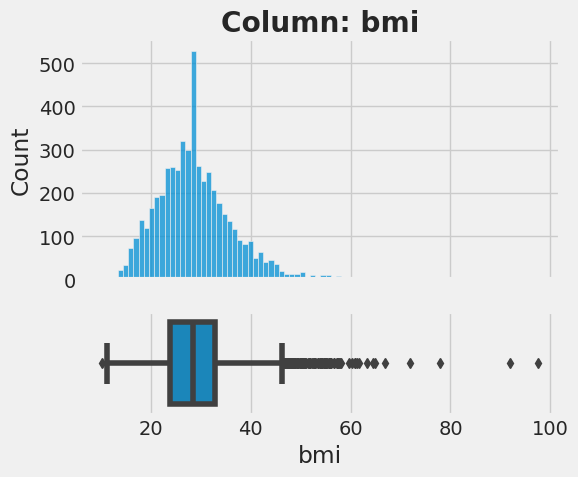

- NaN's Found: 0 (0.0%)
- Unique Values: 418
- Most common value: '28.9' occurs 232 times (4.54%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

missing values : 201 (3.93%)
impute with mean

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of bmi values

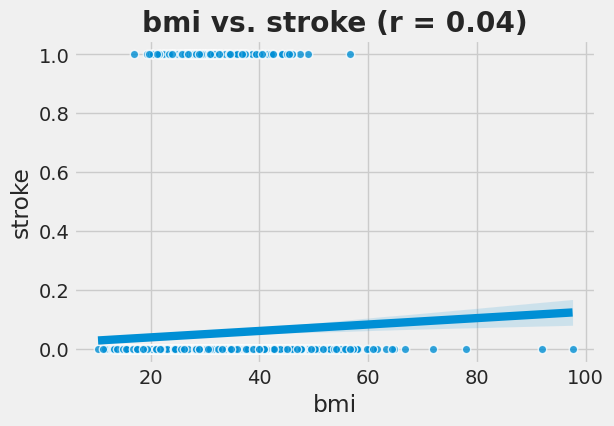

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'stroke');

### Feature vs. Target Observations:

Based on my business understanding, I would expect this feature to be a classificator of the target: I think it's important to know about its body mass index to avoid certain diseases due to obesity.

This feature doesn't appear to be a classificator of the target because it has a very low correlation with it.

### **Age feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "age"
df[feature].dtype

dtype('float64')

### Univariate visualization showing the distribution of age values

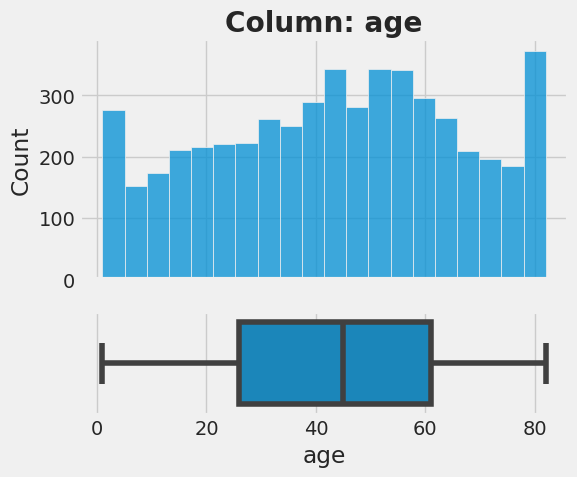

- NaN's Found: 0 (0.0%)
- Unique Values: 82
- Most common value: '43.0' occurs 113 times (2.21%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

No missing values

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of age values

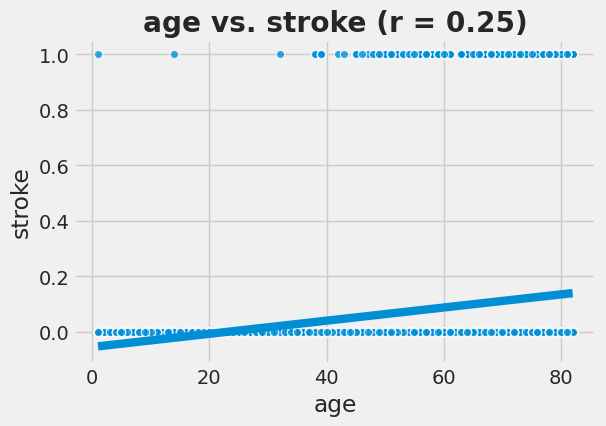

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'stroke');

### Feature vs. Target Observations

Based on my business understanding, I would expect this feature to be a classificator of the target: I think stroke increases with age.

This feature doesn't appear to be a classificator of the target because it has a low correlation with it.

### **avg_glucose_level feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "avg_glucose_level"
df[feature].dtype

dtype('float64')

### Univariate visualization showing the distribution of age values

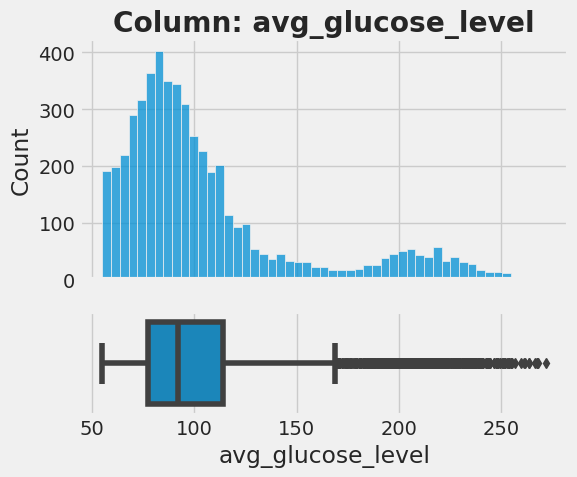

- NaN's Found: 0 (0.0%)
- Unique Values: 3979
- Most common value: '93.88' occurs 6 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

### Feature Observations

It's a numeric feature

No missing values

not constant or quasi-constant feature

cardinality : Not applicable (numeric)

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### Multivariate visualization showing the distribution of avg_glucose_level values

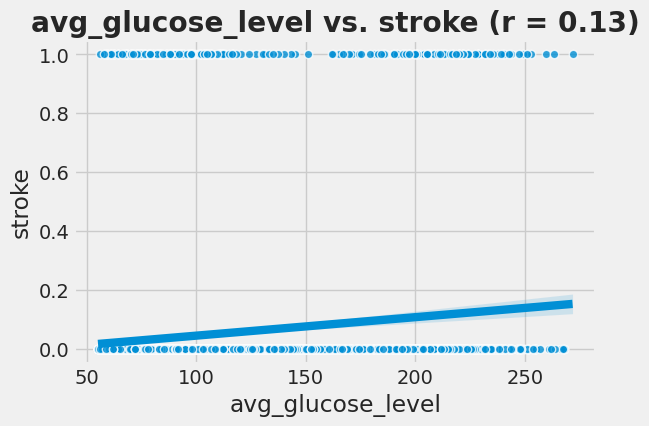

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'stroke');

### Feature vs. Target Observations

Based on my business understanding, I would expect this feature to be a classificator of the target: I think it's important to know about its average glucose level in blood to avoid diabetes which is a serious chronic disease.

This feature doesn't appear to be a classificator of the target because it has a very low correlation with it.

## **CATEGORICAL FEATURES**

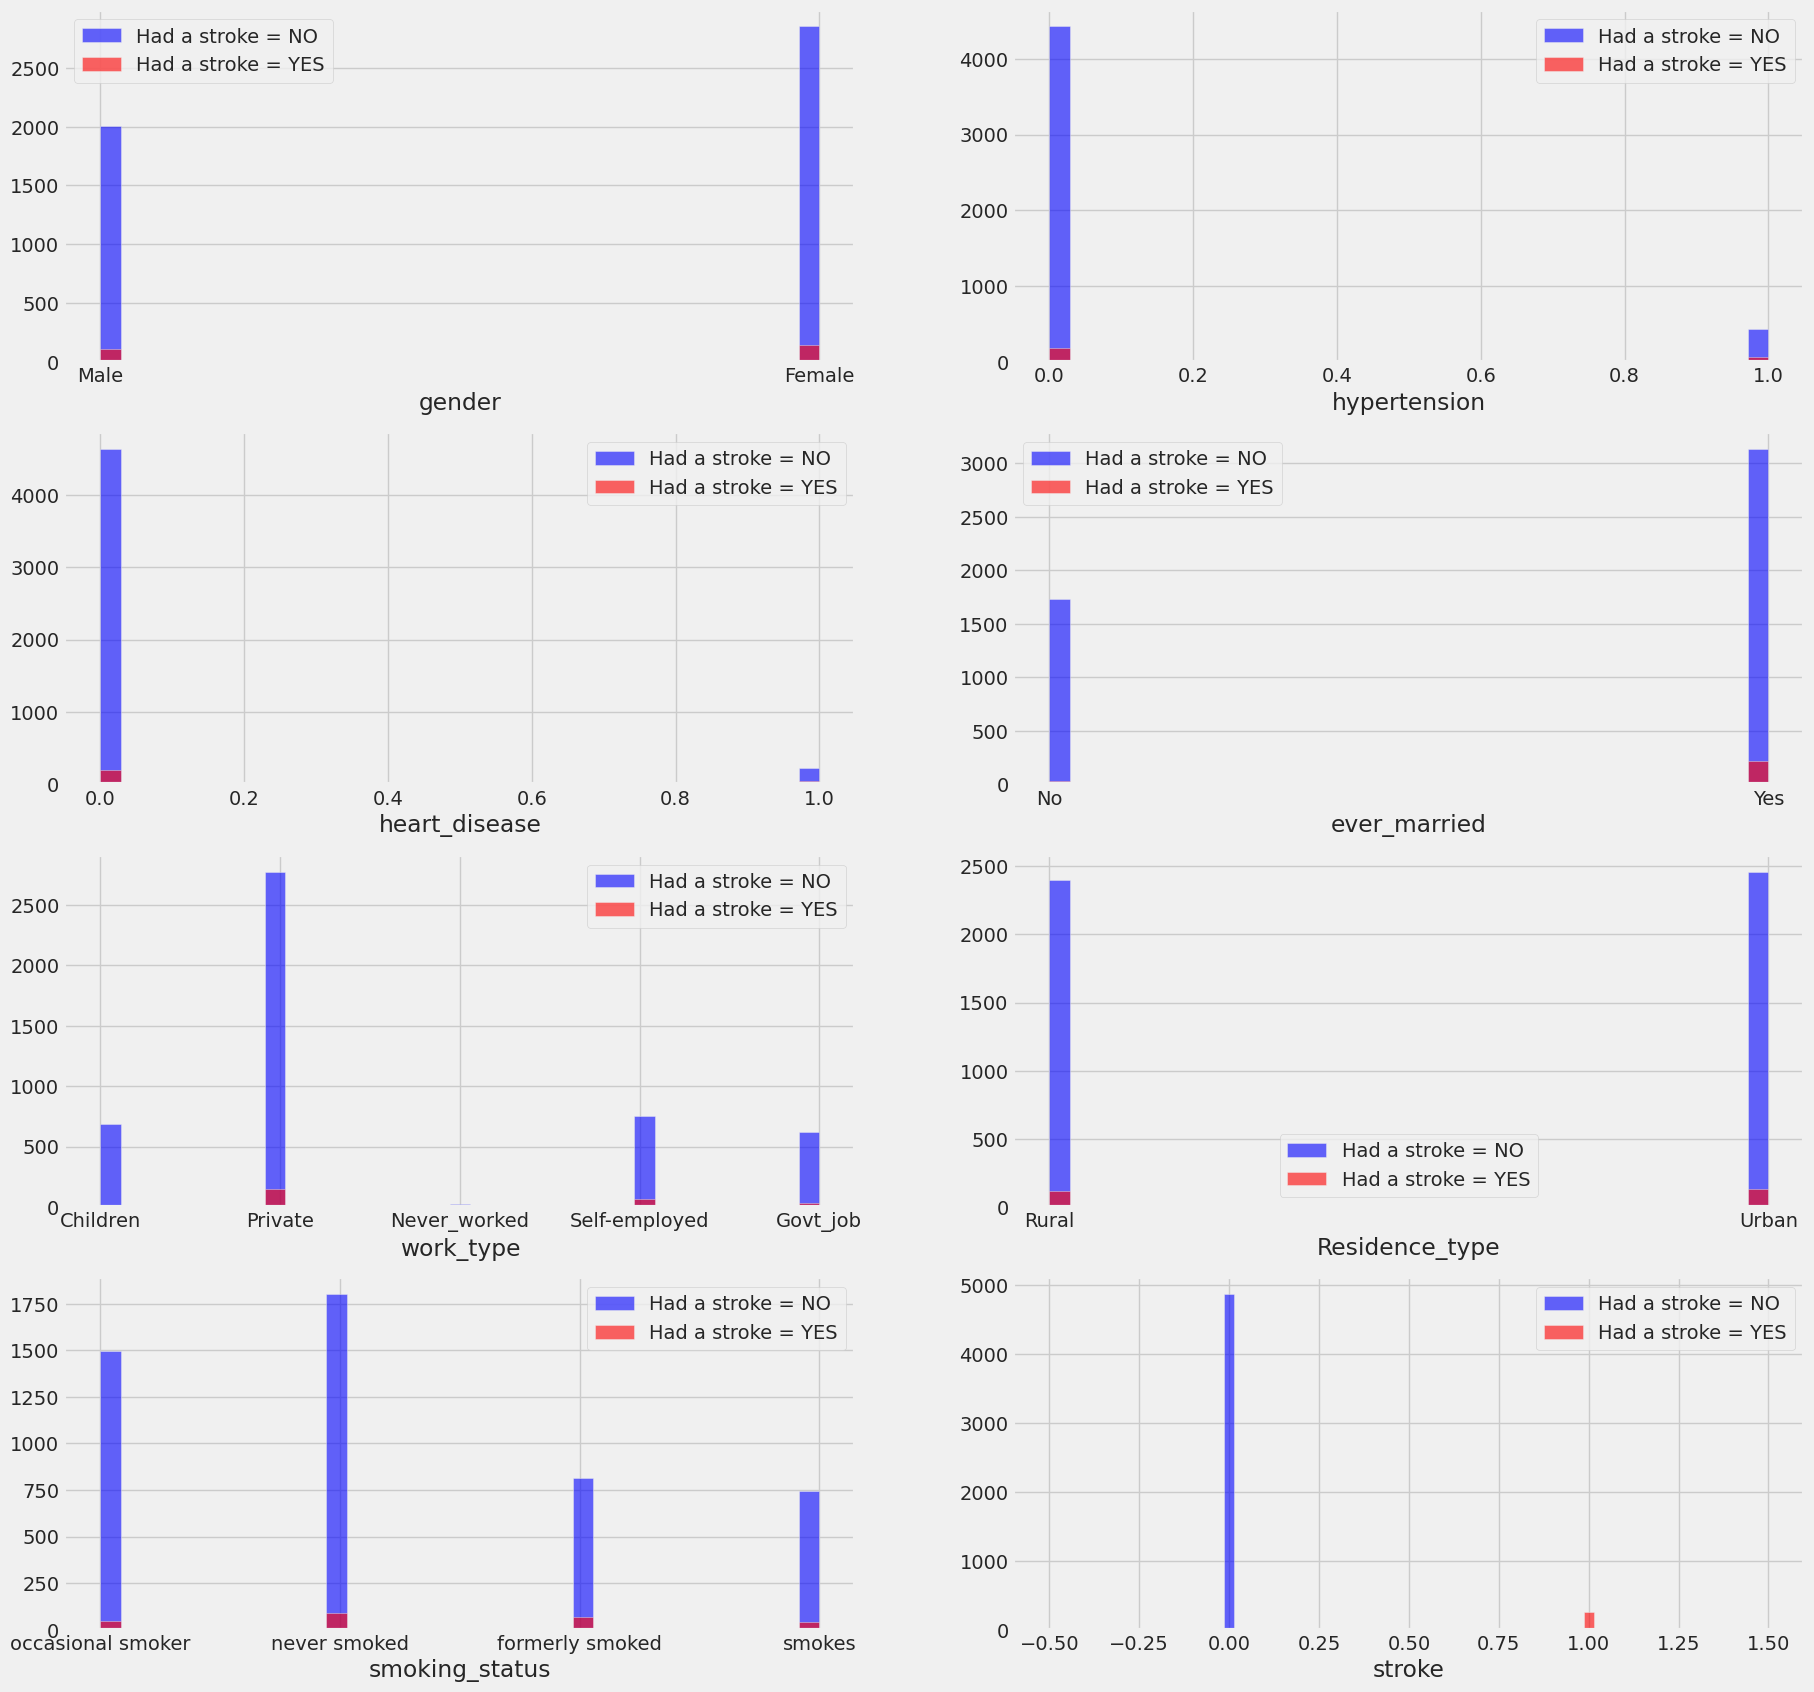

In [ ]:
# Plot histograms for all categorical features
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(4, 2 , i)
    df[df["stroke"] == 0][column].hist(bins=35, color='blue', label='Had a stroke = NO', alpha=0.6)
    df[df["stroke"] == 1][column].hist(bins=35, color='red', label='Had a stroke = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Observations from the above plot :
1. gender {Male, Female} : Stroke targets male patients more than females.
2. hypertension {0 if the patient doesn't have hypertension, 1 if the patient has hypertension} : If the patient does not have hypertension, he has a great chance to avoid stroke.
3. heart_disease {0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease} : If the patient doesn't have cardiovascular disease, he's more likely to avoid stroke.
4. ever_married {No or Yes} : Patients who haven't been married in their lives will be spared by the stroke.
5. work_type {children, Govt_jov, Never_worked, Private or Self-employed} : patients that Never_worked are undiagnosed, children don't have a stroke, Patients who have private jobs are more likely to develop stroke than self_employed or patient with govermental jobs, may be they are more stressed by their work schedules.
6. Residence_type {Rural, Urban} : Urban life induce stroke more than rural life.
7. smoking_status {formerly smoked, never smoked, smokes or occasional smoker}: patients how have never smoked are more likely to be spared from stroke although in some cases related to life quality they may develop stroke.

> ## Custom functions for exploring categorical features

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to prints statements about null values, cardinality, and checks for constant/quasi-constant features"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

    # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

### **Stroke feature (target)**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "stroke"
df[feature].dtype

dtype('int64')

### Univariate visualization showing the distribution of a target (stroke)

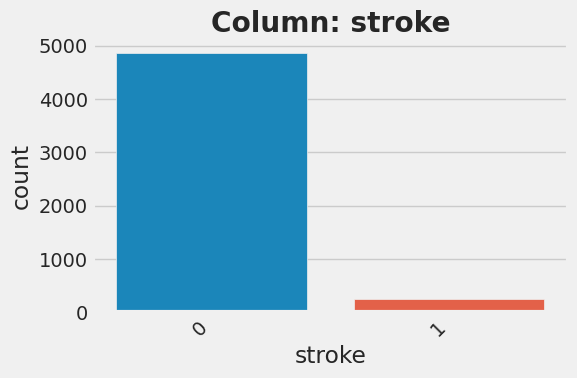

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4861 times (95.13%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

It's a categorical nominal feature : Data Dictionary says it should be 1 if the patient had a stroke or 0 if not

No missing values

not constant or quasi-constant feature

cardinality : 4861

we would know this feature BEFORE the target is determined : since it is our target!

there's an understanding reason to exclude based on our business case : its our target!

### **Gender feature**

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "gender"
df[feature].dtype

dtype('O')

### Univariate visualization showing the distribution of gender groups

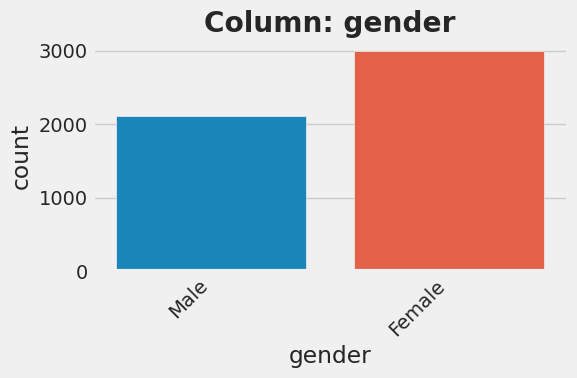

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be Male, Female

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined

there's no a understanding reason to exclude based on our business case

### **hypertension feature**

### Univariate visualization showing the distribution of hypertension groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "hypertension"
df[feature].dtype

dtype('O')

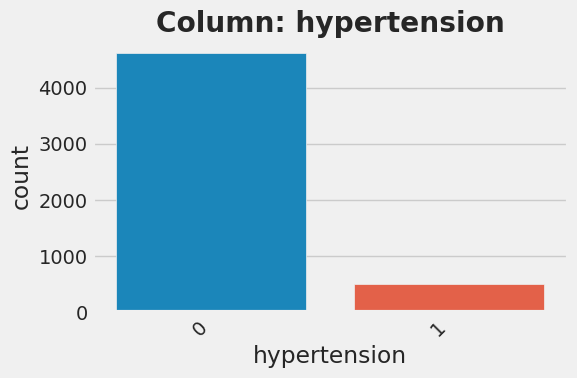

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4612 times (90.25%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **heart_disease feature**

### Univariate visualization showing the distribution of heart_disease groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "heart_disease"
df[feature].dtype

dtype('O')

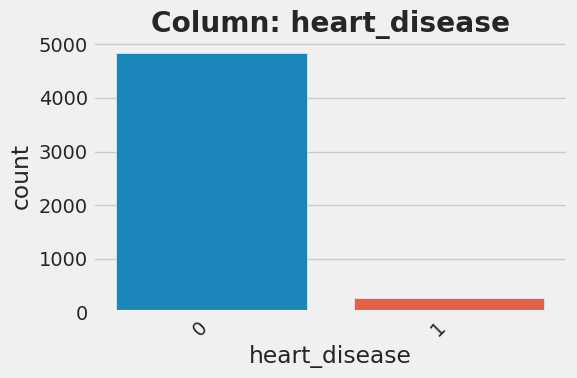

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4834 times (94.6%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **ever_married feature**

### Univariate visualization showing the distribution of ever_married groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "ever_married"
df[feature].dtype

dtype('O')

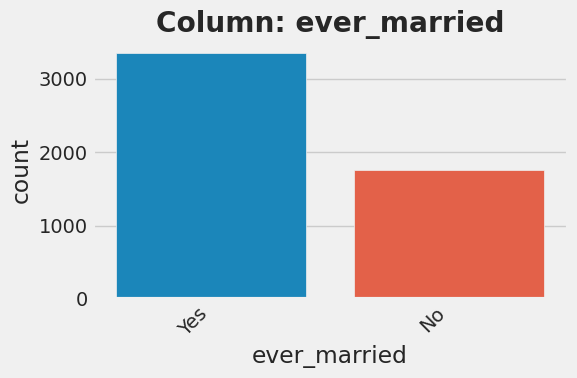

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (65.62%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be "No" or "Yes".

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **work_type feature**

### Univariate visualization showing the distribution of work_type groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "work_type"
df[feature].dtype

dtype('O')

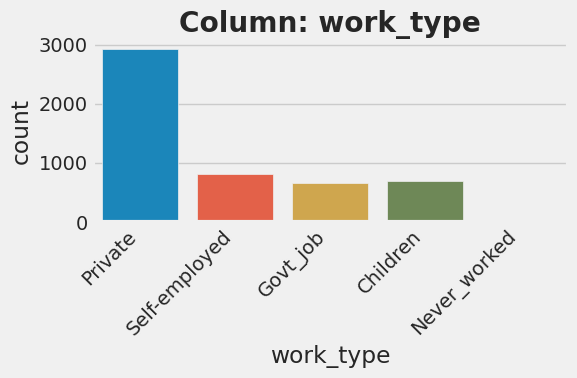

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2925 times (57.24%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be children, Govt_jov, Never_worked, Private or Self-employed

No missing values

not constant or quasi-constant feature

cardinality : 5

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **Residence_type feature**

### Univariate visualization showing the distribution of Residence_type groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Residence_type"
df[feature].dtype

dtype('O')

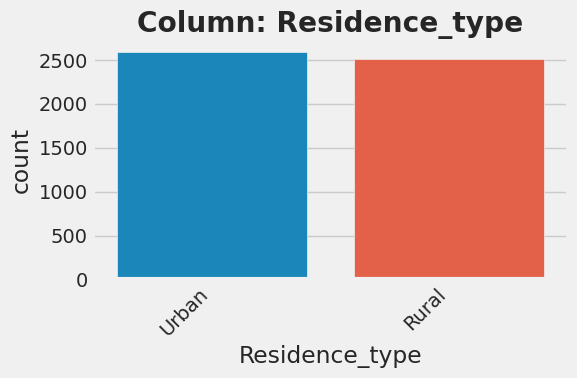

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2596 times (50.8%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be Rural or Urban

No missing values

not constant or quasi-constant feature

cardinality : 2 very low

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

### **smoking_status feature**

### Univariate visualization showing the distribution of smoking_status groups

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "smoking_status"
df[feature].dtype

dtype('O')

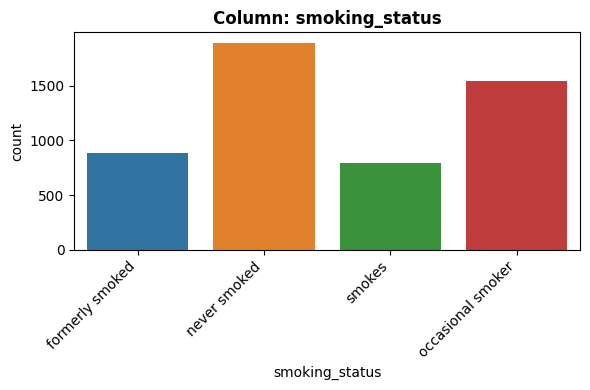

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.


In [ ]:
# The style to the default Matplotlib
plt.style.use('default')
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

### **Feature Observations**
It's a categorical nominal feature : Data Dictionary says it should be formerly smoked, never smoked, smokes or occasional smoker

No missing values

not constant or quasi-constant feature

cardinality : 4

we would know this feature BEFORE the target is determined.

there's no a understanding reason to exclude based on our business case.

## **Exploratory visuals for the target and all features**

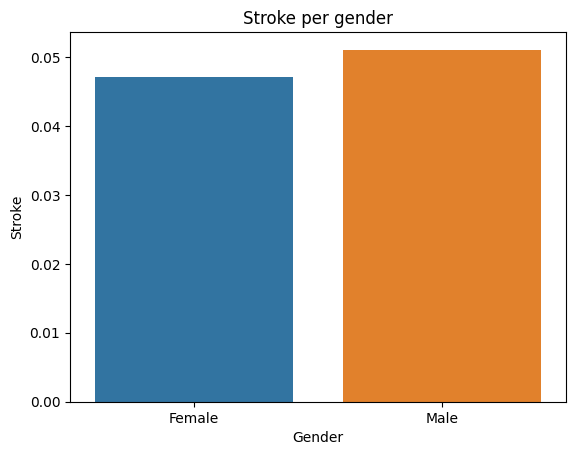

In [ ]:
# Group stroke by gender
stroke_gender=df.groupby('gender')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_gender.index, y=stroke_gender.values);
plt.xlabel('Gender');
plt.ylabel('Stroke');
plt.title('Stroke per gender');

* Stroke targets male patients more than females.

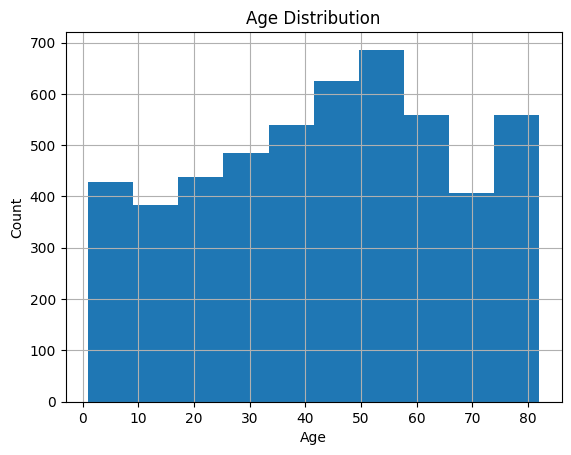

In [ ]:
# Plot histogram for 'age' feature
df['age'].hist()
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age Distribution');

* Most patients have an age between 50 and 58 years old.

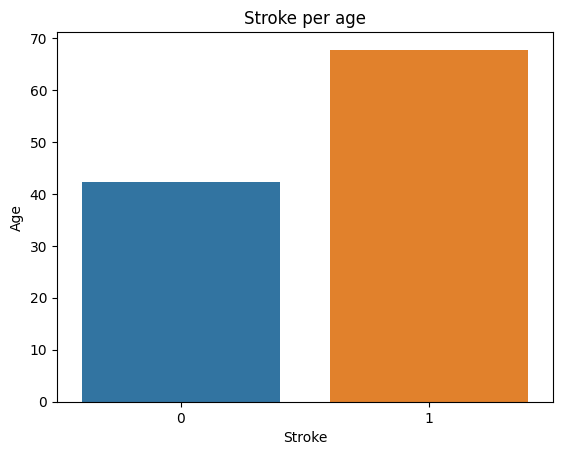

In [ ]:
# Group age by stroke
stroke_age=df.groupby('stroke')['age'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_age.index, y=stroke_age.values);
plt.xlabel('Stroke');
plt.ylabel('Age');
plt.title('Stroke per age');

* Patients who are more than 40 are most likely to develop a stroke.

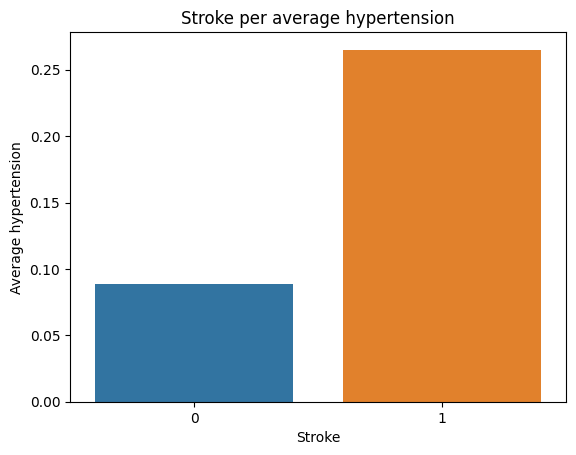

In [ ]:
# Group hypertension by stroke
stroke_hyper=df.groupby('stroke')['hypertension'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_hyper.index, y=stroke_hyper.values);
plt.xlabel('Stroke');
plt.ylabel('Average hypertension');
plt.title('Stroke per average hypertension');

* Patients who have an hypertension lower than 0.1 are not likely to develop a stroke. High blood pressure is the biggest risk factor for stroke. It can lead to blocked arteries, it can also make them weaker, causing them to break which can cause a stroke.

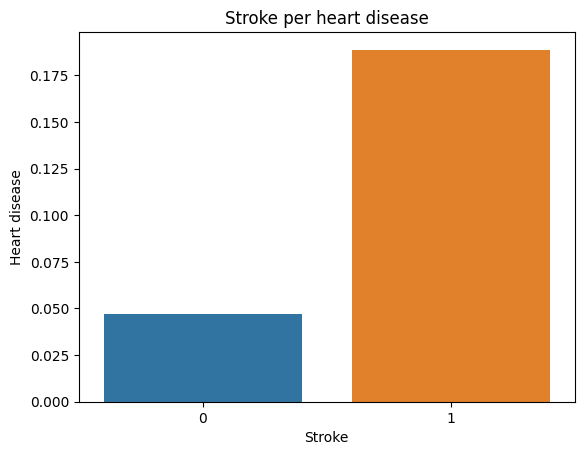

In [ ]:
# Group heart_disease by stroke
stroke_heart=df.groupby('stroke')['heart_disease'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_heart.index, y=stroke_heart.values);
plt.xlabel('Stroke');
plt.ylabel('Heart disease');
plt.title('Stroke per heart disease');

* A high rate of cardiovascular disease necessarily leads to a stroke.

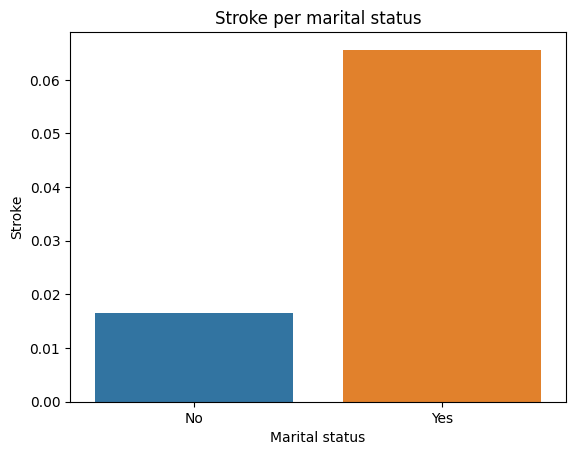

In [ ]:
# Group stroke by ever_married
stroke_marr=df.groupby('ever_married')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_marr.index, y=stroke_marr.values);
plt.xlabel('Marital status');
plt.ylabel('Stroke');
plt.title('Stroke per marital status');

* Patients who have been married at least once in their lives develop more stroke than single ones may be due to the conflicts between spouses.

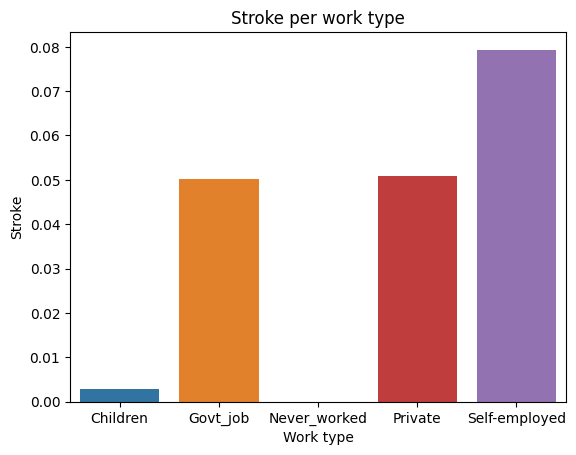

In [ ]:
# Group stroke by work type
stroke_work=df.groupby('work_type')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_work.index, y=stroke_work.values);
plt.xlabel('Work type');
plt.ylabel('Stroke');
plt.title('Stroke per work type');

* Patients who have private or government jobs are equally affected by a stroke, self employed are the most affected may be because their condition is more stressful than patients with a fixed salary, patients who have never worked are not affected by a stroke. So stress is the trigger for stroke.

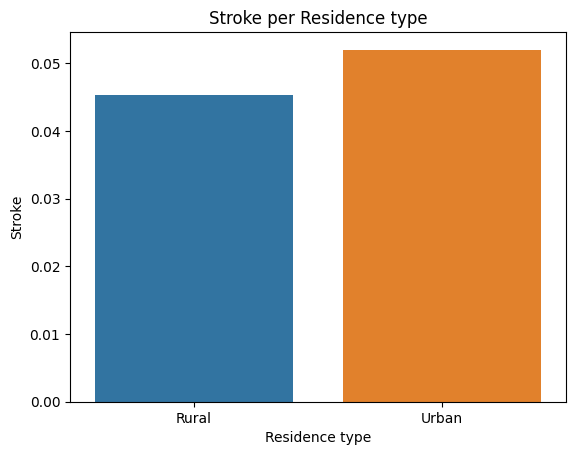

In [ ]:
# Group stroke by Residence_type
stroke_res=df.groupby('Residence_type')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_res.index, y=stroke_res.values);
plt.xlabel('Residence type');
plt.ylabel('Stroke');
plt.title('Stroke per Residence type');

* Urban life induces stroke much more than rural life.

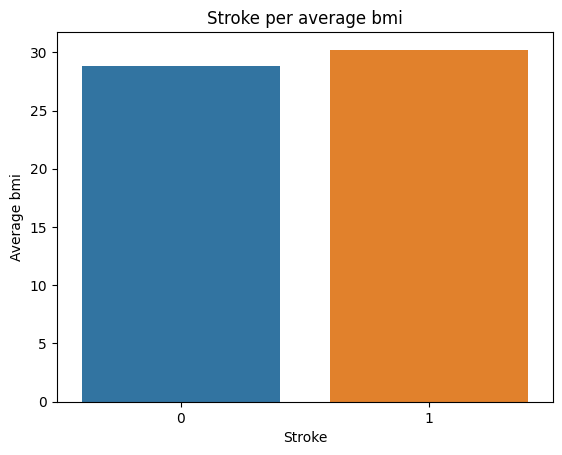

In [ ]:
# Group bmi mean by stroke
stroke_bmi=df.groupby('stroke')['bmi'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_bmi.index, y=stroke_bmi.values);
plt.xlabel('Stroke');
plt.ylabel('Average bmi');
plt.title('Stroke per average bmi');

* Diagnosis based on body mass index is not very relevant to determine if the patient will have a stroke.

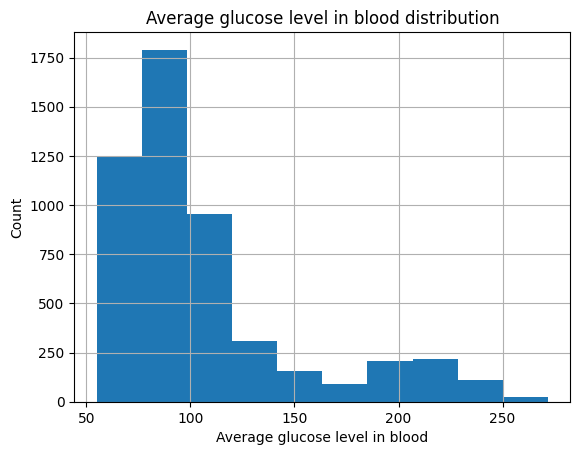

In [ ]:
# Plot histogram for 'avg_glucose_level' feature
df['avg_glucose_level'].hist()
plt.xlabel('Average glucose level in blood');
plt.ylabel('Count');
plt.title('Average glucose level in blood distribution');

* The most important Average glucose level in blood is between 60 and 100.

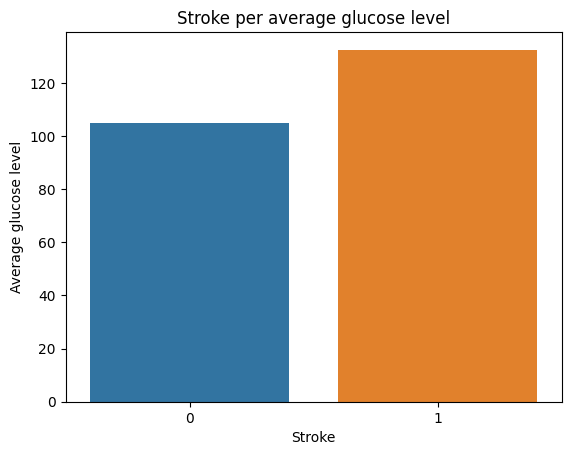

In [ ]:
# Group avg_glucose_level mean by stroke
stroke_glu=df.groupby('stroke')['avg_glucose_level'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_glu.index, y=stroke_glu.values);
plt.xlabel('Stroke');
plt.ylabel('Average glucose level');
plt.title('Stroke per average glucose level');

* For glucose levels above 100 patients are more likely to develop stroke.

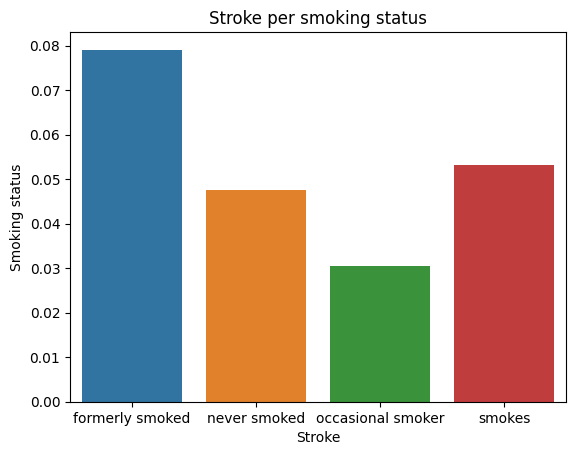

In [ ]:
# Group stroke by smoking_status
stroke_smo=df.groupby('smoking_status')['stroke'].mean()
# Create barplot with seaborn
sns.barplot(x=stroke_smo.index, y=stroke_smo.values);
plt.xlabel('Stroke');
plt.ylabel('Smoking status');
plt.title('Stroke per smoking status');

* Patients who are formaly smoked or smokes are most susceptible to stroke. Patients that never smoked may have a stroke more than the occasional smokers maybe they have poor or unhealthy life quality.